In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = np.array(pd.read_csv("E:\\Linear Regression\\Height_Weight.csv"))

In [21]:
X = data[:,0]
y = data[:,1]

In [22]:
u = np.mean(X)
std = np.std(X)
X = (X-u)/std

In [23]:
#plt.scatter(X,y)
y = y.reshape(35,1)
X = X.reshape(35,1)

In [24]:
def hypothesis(X,theta):
    y_ = theta[1]*X + theta[0]
    return y_

def error(X,y,theta):
    m,n = X.shape
    y_ = hypothesis(X,theta)
    err = np.sum((y_-y)**2)
    return err/m

def gradient(X,y,theta):
    m,n = X.shape
    y_ = hypothesis(X,theta)
    grad = np.zeros((2,))
    grad[0] = np.sum(y_-y)
    grad[1] = np.dot(X.T,(y_-y))
    return grad/m

def gradientDescent(X, y, learning_rate = 0.1, epoch = 300):
    m,n = X.shape
    err = []
    theta = np.zeros((2,))
    grad = np.zeros((2,))
    for i in range(epoch):
        er = error(X,y,theta)
        err.append(er)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate * grad
    return err,theta

In [25]:
err,theta = gradientDescent(X,y)

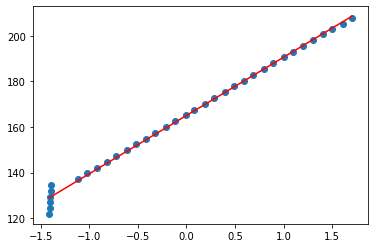

In [26]:
y_ = theta[1]*X + theta[0]
plt.scatter(X,y)
plt.plot(X,y_,color='red')

In [27]:
def r2score():
    Ypred = hypothesis(X,theta)
    num = np.sum((y-Ypred)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

In [28]:
r2score()

99.49028181951735

(35,)